In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\mashroom_dataset\cleaned_dataset_mashroom.csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# X and y

In [6]:
X = df.drop(columns = ['class'])
y = df['class']

# Train_test_split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= True)

# Gradient Boost

**Applying Hyperparameter Tuning for identiying best parameters for Gradient Boost**

In [8]:
from sklearn.model_selection import GridSearchCV

# modelling

from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()

# parameters grid
param_grid_gb = {"n_estimators" : [1,5,10,20],
                'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]}

# grid search
grid_gb = GridSearchCV(estimator_gb, param_grid_gb, cv = 5, scoring = 'accuracy')
grid_gb.fit(X_train, y_train)

# best parameters for GradientBoostingClassifier model
grid_gb.best_params_

{'learning_rate': 0.5, 'n_estimators': 20}

# Gradient Boost model importance feature

In [10]:
feats_gb = pd.DataFrame(data = grid_gb.best_estimator_.feature_importances_,
                       index = X.columns, 
                       columns = ['Importance'])
imp_features_list_gb = feats_gb[feats_gb['Importance']>0].index.to_list()
imp_features_list_gb

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

# Gradient Boost Classifier

**with imp features and imp parameters**

In [11]:
# important input variables
X_imp = X[imp_features_list_gb]

# train test split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_imp, y, test_size = 0.2, random_state = True)
# modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.5)
gb.fit(X_train_gb, y_train_gb)

# Evaluation on train data
ypred_train_gb = gb.predict(X_train_gb)

from sklearn.metrics import accuracy_score
print("Train_accuracy : ", accuracy_score(y_train_gb, ypred_train_gb))

# cross validation
from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(gb, X_train_gb, y_train_gb, cv = 5).mean())

# Evaluation
ypred_test_gb = gb.predict(X_test_gb)
print("Test_accuracy : ", accuracy_score(y_test_gb, ypred_test_gb))


Train_accuracy :  1.0
cross_val_score :  0.9998461538461537
Test_accuracy :  1.0


In [12]:
%%timeit
gb.fit(X_train_gb, y_train_gb)


264 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Final model

In [13]:
gb = GradientBoostingClassifier(n_estimators= 20, learning_rate = 0.5)


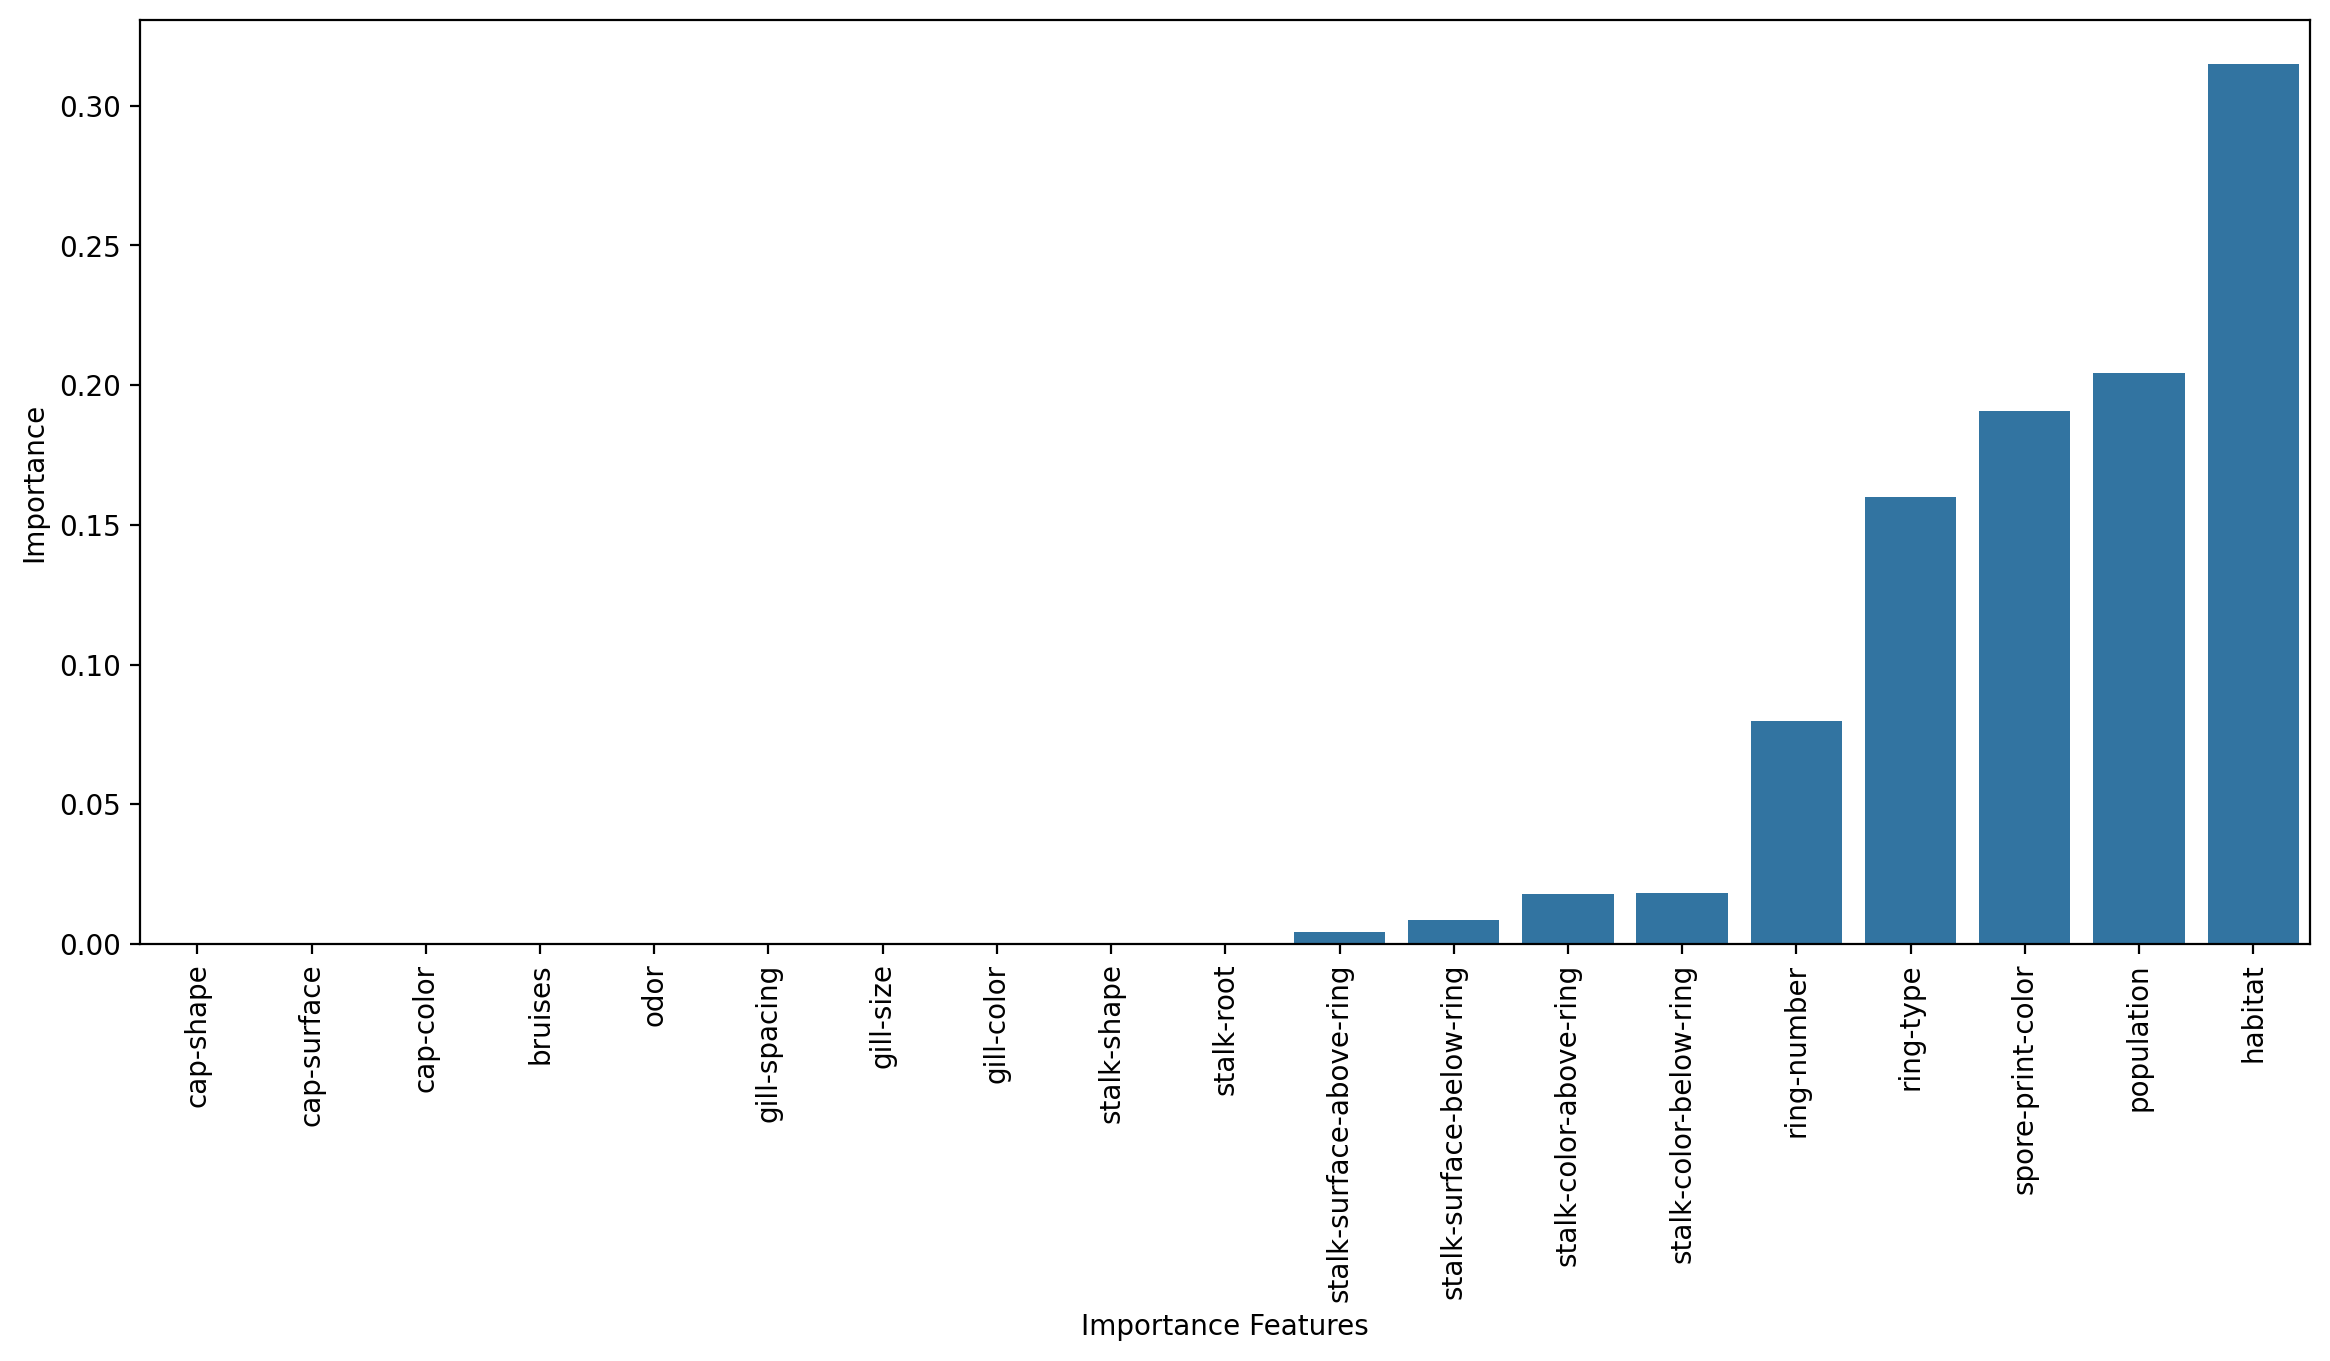

In [15]:
plt.figure(figsize = (14,6), dpi = 200)

sns.barplot(data = feats_gb[feats_gb['Importance'] > 0].sort_values('Importance'),
           x = feats_gb[feats_gb['Importance'] > 0].index,
           y = 'Importance')
plt.xticks(rotation = 90)
plt.xlabel('Importance Features')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_gb, ypred_test_gb)

array([[820,   0],
       [  0, 805]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_gb, ypred_test_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

